# When the "*n* + 1" Rule Doesn't Apply: More Complicated Splitting Patterns

## **Instructions:** From the "Cell" dropdown menu, select  "Run All". The interactive plots that accompany the text will be activated.

This tutorial borrows, or has adapted, many of its examples from Prof. Hans Reich's (U. Wisconsin-Madison) NMR website: 

https://www.chem.wisc.edu/areas/reich/chem605/index.htm

This is an invaluable resource for anyone wanting to "level up" their NMR knowledge!

In [1]:
from ipywidgets import interactive
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

For many of the simple molecules you'll encounter in CHEM333, the "n + 1" rule can be used to predict or interpret the multiplicity of an NMR signal. However, this rule very often does not hold. For the "*n* + 1" to be applicable:

- all neighboring nuclei must split the signal to the same extent (i.e. all *J* coupling constants must be the same)
- all chemical shift-equivalent nuclei must also be magnetically equivalent (see below)

The "*n* + 1" is most reliable for acyclic alkyl groups, where bond rotation is rapid and no strong conformational preference exists. Coupling constants of ~7 Hz are typical in these systems. 

More complicated systems where the n + 1 rule doesn't hold fall into two categories:

1. *First-order*: the signal can be deconvoluted into individual "n + 1" multiplet splittings, with different multiplets for different *J* couplings. Accurate chemical shifts and coupling constants can be determined directly from the chemical shifts/frequencies (the x-axis coordinate).

2. *Second-order*: "true" chemical shifts and coupling constants cannot be determined by direct measurement. This is common in systems where:
  - the size of *J* is around, or greater than, the size of the chemical shift difference between coupled protons (in Hz).
  - there are chemical shift-equivalent protons that are not magnetically-equivalent. 


## First-Order Multiplets

### Two couplings: doublet of doublets (dd)

When a proton is split by two neighboring nuclei, but to different degrees (i.e. the two *J* coupling constants are different), a doublet of doublets pattern results: 4 peaks of equal intensity (1 : 1 : 1 : 1).

For any first-order multiplet:
- the multiplet is centrosymmetric (i.e. symmetric left-right). The center of the multiplet is the chemical shift for the proton--in the absence of any splitting, a singlet would appear at this frequency.
- the ratios of peak areas (with the smallest peak = 1) should add up to a power of 2. In the case of a doublet of doublets, 1 + 1 + 1 + 1 = 4 = $2^2$.


In [2]:
from plots import interactive_dd

interactive(interactive_dd, J1=(0, 20, 0.1), J2=(0, 20, 0.1), w=(0.1, 1, 0.1))

In [3]:
# space

#### Exercise: doublet of doublets

The plot above should initialize as a dd for 1 H, with $J_1 = 3$ Hz and $J_2 = 7$ Hz. In these simulated examples, the height of each peak (0.25) happens to be proportional to the area (CAUTION: this is often not true in real spectra because line widths can differ). The relative intensities are 0.25 : 0.25 : 0.25 : 0.25, or 1 : 1 : 1 : 1.

* Drag both *J* sliders to 0 (or, type "0" in the fields to the right of each slider and hit "Return" or "Enter" on your keyboard). You should see the signal collapse to a singlet at 100 Hz. If the x axis started at 0 Hz for TMS, and the spectrometer were a 100 MHz spectrometer, this would correspond to a chemical shift of 1 ppm. Note the height of the signal (an approximation of its total area) is now 1. In the absence of any splitting, this proton will only resonate at this one frequency, and its integration would be normalized as 1 H.

* Now, drag the $J_2$ slider back to 7 Hz. A doublet with a 7-Hz splitting results. Each peak is half intensity, and would integrate to 0.5 H. This means that half of the nuclei are resonating 3.5 Hz lower than 100 MHz, and half 3.5 Hz higher. The signal is centrosymmetric about 100 MHz.

* Drag the $J_1$ slider to about 0.5 Hz. Each peak in the previous doublet has started to split into doublets themselves. When the size of the splitting is small compared to the peak width (set to 0.5 Hz, and controlled by the "w" slider), you won't see complete separation of the peaks, and in a real spectrum if the signal-to-noise ratio is small enough it can be difficult to determine if this is a "real" splitting or not.

* Drag the $J_1$ slider back to 3 Hz. The signals are now well separated, and the dd pattern is clear. When analyzing such first-order multiplets, start by measuring the distance between the first two peaks (or the last two), and the distance between the first and third peaks (or the last and third-last). These distances, in Hz, will be two coupling constants. In the dd case, this completes the analysis--the two splittings can be measured as 3 and 7 Hz, and the center of the signal (in ppm) would be the chemical shift. 

In the chemical literature, coupling constants are listed in order from largest to smallest, and the corresponding splitting (d for doublet, t, for triplet, q for quartet etc. ) follow the same order. This signal would be reported (if this were a 100-MHz spectrometer) as: "$\delta$ 1.00 ppm (1H, dd, *J* = 7.0, 3.0 Hz)".

* Drag the $J_1$ slider to 7 Hz. Now that both coupling constants are the same, the inner two peaks overlap to form a double-intensity signal, and the 1 : 2 : 1 triplet pattern results. The patterns that result from the *n* + 1 rule (doublets, quartets, quintets) are the special cases that result when coupling constants are the same size. 

Note that a proton may have two different neighbors (protons that are not related by symmetry or exchanged by rotation) that coincidentally have the same *J* value, or very similar. Sometimes spectra taken on more powerful spectrometers can appear more complicated because these small differences can be detected. 

* Drag the $J_1$ slider slightly back, to 6.5 Hz. The triplet has started to break up. On a spectrometer with poorer resolution, this may still look like a triplet, or like a "squashed triplet" with the middle peak being a bit shorter and broader. Slide the "w" setting up to 1.00 Hz to simulate this effect.



### Three couplings: doublet of doublet of doublets (ddd)
The plot below is an example of a ddd pattern with no coincedental overlap. There are 8 peaks of equal intensity. 8 is $2^3$, so there are three couplings.

If you could measure the distances in Hz between peaks, how would you go about analyzing such a signal? You can start "untangling the knot" by realizing:
- the distance between the first two peaks is the smallest coupling constant (here, $J_1$)
- every peak will be half of a doublet with a splitting of $J_1$
- if the effect of this splitting is removed, the signal will reduce in complexity (here, to a dd)
- repeat the process until all coupling constants are determined

This is often shown graphically with a "tree diagram", as shown below.

<img src='img/ddd2.png' style="width: 600px;">

If you had a spectrum with peak picking in Hz, then $J_1$ would be the difference in frequency between the first and second peaks, $J_2$ the distance between the first and third, and $J_3$ the distance between the first and fourth. **This will not always be the case**. However, the distance between the first two (or last two) peaks will always be a true coupling constant (in a first-order multiplet).

You can graphically simulate this thought process by manipulating the plot below. First, change J1 to 0 Hz to remove the smallest doublet splitting and simplify the multiplet to a dd. Then, change J2 to 0 to simplify to a d, and finally change J3 to 0 to collapse the signal all the way to a singlet.

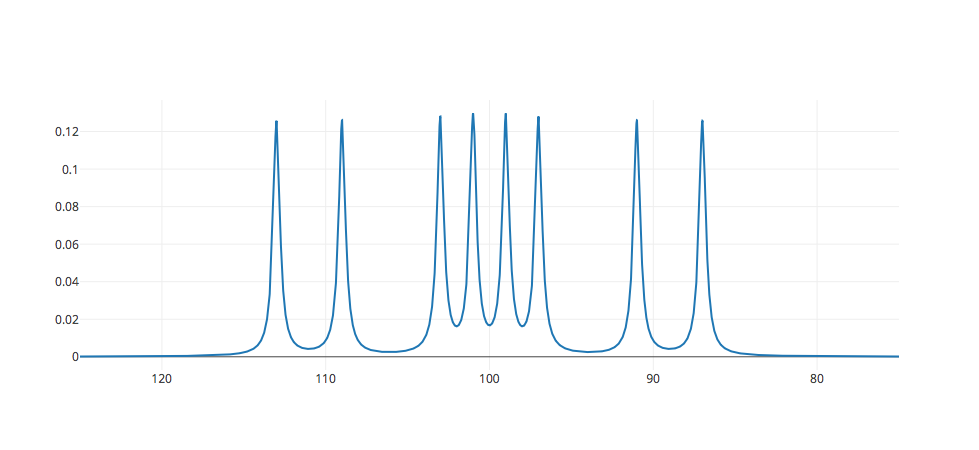

In [4]:
from plots import interactive_ddd

interactive(interactive_ddd, J1=(0, 20, 0.1), J2=(0, 20, 0.1), J3=(0, 20, 0.1))

Coincidental overlap can reduce the number of peaks in the ddd pattern.

Adjust the sliders in the above simulation so that J1 and J2 = 10 Hz, and J3 = 4 Hz. The resulting pattern is a triplet of doublets, and would be reported as "td, *J* = 10.0, 4.0 Hz". Note that the coupling constants are listed in order from largest to smallest, and so the multiplicities are listed as "td" and not "dt". The ratio of the peak intensities is 1:1:2:2:1:1, which adds up to 8.

Adjust the J2 slider to 4 Hz. The resulting signal is a doublet of triplets, with peak intensities in the ratio of 1:2:1:1:2:1. This would be reported as "dt, *J* = 10.0, 4.0 Hz". Note the importance of listing the multiplicities in the correct order (td vs dt) to properly describe the appearance of the signal.

Adjust the J1 slider to 8 Hz. There is now coincidental overlap of two of the peaks (the inner two peaks of relative intensity 1 are now a single peak with a relative intensity of 2). This would still be considered a doublet of triplets. Note how it almost looks like an "*n* + 1" pentet, but the intensities are wrong (1:2:2:2:1 for the dt, vs. 1:4:6:4:1 for a pentet).

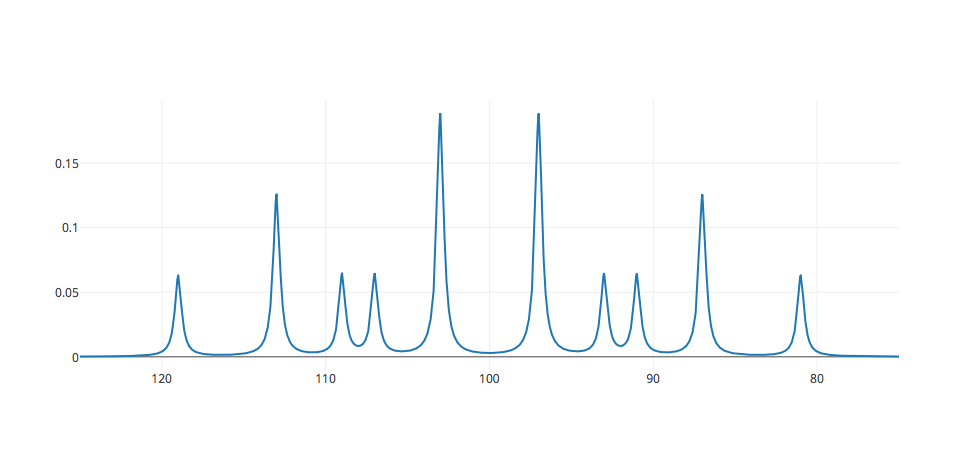

In [ ]:
from plots import interactive_dddd

interactive(interactive_dddd, J1=(0, 20, 0.1), J2=(0, 20, 0.1), J3=(0, 20, 0.1), J4=(0, 20, 0.1))

In [ ]:
# TODO: dddd examples

## Second-Order Patterns

The main goal of this section of the tutorial is to be able to predict if a molecule's spectrum may have a non-first order spectrum, and also to be able to spot "second-order weirdness" when you see it in a spectrum.

In order to talk about second-order NMR spectra, and be able to predict when second-order effects can be expected, we need to define the following terms:
- chemical shift equivalence/non-equivalence
- magnetic equivalence/non-equivalence

### Chemical Shift Equivalence

If two nuclei exhibit the exact same chemical shift, either because there is a symmetry element in the molecule, or because of rapid exchange, they are "chemical shift equivalent". The protons of the methyl group are equivalent because rapid rotation about the C-C bond exchanges them, and on average they will have the same chemical shift:

<img src='img/homotopic.png' style='width: 600px;'>

Chloroethane (Cl-CH<sub>2</sub>-CH<sub>3</sub>) has two sets of chemical shift-equivalent protons. The protons of the downfield methylene group are chemical shift-equivalent because there is a mirror plane of symmetry relating them:

<img src='img/enantiotopic.png' style='width: 600px;'>

##### Homotopic, Enantiotopic, and Diastereotopic Nuclei: The Substitution Test

In the case of chloroethane, the protons of the methyl group are *homotopic*: they will have the same chemical shift, even if they are placed in a chiral environment (e.g. in a chiral solvent, or inside an enzyme's active site). 

The methylene protons are *enantiotopic*: they will have the same chemical shift *in an achiral environment*. However, in the presence of a chiral environment, they can have different chemical shifts. 

If there is no element of symmetry or exchange between two geminal protons, they are *diastereotopic* and will always be chemical-shift inequivalent (although they may coincidentally have chemical shifts to close to distinguish). 

One way to check if two protons are homotopic, enantiotopic, or diastereotopic is to substitute one of the protons with another atom such as Cl or D. Then, perform the substitution with the other proton instead. 

- if both substitutions give the same result, the protons were homotopic. For example, substitution of any of the three methyl protons in chloroethane with deuterium give the same molecule, Cl-CH<sub>2</sub>-CH<sub>2</sub>-D.

<img src='img/homotopic_substitution.png'>

Homotopic protons will have the same chemical shift, even if they are placed in a chiral environment (e.g. in a chiral solvent, or inside an enzyme's active site).

- if the substitutions give different enantiomers, the protons were enantiotopic. For example, substitution of a methylene proton in chloroethane with fluorine will give either *(R)*- or *(S)*-1-chloro-1-fluoroethane.

<img src='img/enantiotopic_substitution.png' style='width: 600px;'>

- if the substitutions give diastereomers, the protons were diastereotopic. For example, the methylene protons in *(R)*-2-bromobutane are diastereotopic:

<img src='img/diastereotopic_substitution.png' style='width: 600px;'>

Diastereotopic protons will always be chemical-shift inequivalent (although they may coincidentally have chemical shifts to close to distinguish). 

### Magnetic Equivalence

If two chemical shift-equivalent nuclei have identical coupling constants to *each and every* other nucleus in the spin system, they are magnetically equivalent; if not, they are magnetically inequivalent.

In the case of chloroethane, the two methylene protons are magnetically equivalent: on average, they see the three methyl protons to the same extent, and have the same *J* coupling to them. For the same reason, the three methyl protons are magnetically equivalent as well.

A common case where chemical shift-equivalent protons are *not* magnetically-equivalent is with *para*-disubstituted benzenes. In the example below, protons $H_1$ and $H_2$ are chemical shift-equivalent, and $H_3$ and $H_4$ are chemical shift-equivalent as well. However, the size of $J$ couplings between these sets of protons vary. For example, the *ortho-* $J_{13}$ coupling is typically around 7 Hz, whereas the *para-* $J_{23}$ coupling is typically very small (close to zero). Therefore $H_1$ and $H_2$ are magnetically inequivalent, because they couple to $H_3$ differently.

<img src='img/magnetic_inequivalence.png' style='width: 300px;'>

## Second-Order Patterns  <br>

### Pople Nomenclature

We can describe "spin systems" (groups of coupled nuclei) using "Pople nomenclature": a naming scheme that groups the nuclei by chemical shift and magnetic equivalence. As examples of what Pople nomenclature looks like,here are some common systems that display second-order effects:

- AB ("AB quartet")
- ABX
- ABX<sub>3</sub>
- AA'XX'


#### Chemical Shift Equivalence

In Pople nomenclature, different capital letters of the alphabet refer to nuclei exhibiting different chemical shifts. If two or more nuclei are chemical shift-equivalent and magnetically equivalent, a subscript follows the letter to indicate the number.

If two nuclei are far apart in chemical shift, letters far apart in the alphabet are chosen (commonly: AX for two nuclei; AMX for three nuclei). If they are close in chemical shift (where their separation in Hz approaches the size of their coupling in Hz), letters close together in the alphabet are chosen (e.g. AB for two nuclei; ABX for two nuclei close in chemical shift, and one further away). 

Example: chloroethane (Cl-CH<sub>2</sub>-CH<sub>3</sub>) has an A<sub>2</sub>X<sub>3</sub> spin system. 


#### Magnetic Equivalence

Chemical shift-equivalent nuclei that are magnetically inequivalent are distinguished by the use of **\'** ("prime"), **\'\'** ("double prime") etc. For example, the protons of a *para-* disubstituted benzene are an AA'XX' system ("A A-prime X X-prime"). The couplings $J_{AX}$ and $J_{A'X}$ are different.

# AB

This is a common pattern. For example, an isolated methylene group in a chiral molecule (i.e. where the two protons are diastereotopic) can display this pattern.

When $J >> \Delta \nu$ (the chemical shift difference in Hz, not ppm), the pattern resembles two doublets. As the chemical shift difference becomes smaller, distortions appear. First, the inner peaks of this 4-peak signal grow larger as the outer peaks grow smaller. {In general, protons that are coupled show a "leaning towards each other) effect like this that increases as the chemical shift difference decreases.} Second, the chemical shift of each proton is not exactly in the middle of the doublet, and as the two signals approach each other in chemical shift this difference becomes more pronounced.

- In the interactive plot below, note that when $\nu_1$ (v1) = 150 Hz (an arbitrary chemical shift in Hz, not ppm) and $\nu_2$ (v2) = 50 Hz, the pattern resembles two doublets. The chemical shift difference (100 Hz) is much larger than the coupling (10 Hz), and the distortion is minimal--slight leaning of the signals toward each other, and the midpoints of the "doublets" being very close to 150 and 50 Hz.

- Now, change v1 to 110 Hz and v2 to 90 Hz. The leaning is more pronounced, and could be mistaken for a first-order quartet. Such AB signals are commonly referred to as "AB quartets". Above and to the right of the plot is a toolbar. If you select the "zoom" tool and zoom in on the AB quartet, you can see that the midpoint of each doublet is now far off from 110 Hz / 90 Hz. The "true" chemical shifts (110 and 90 Hz) are much closer to the larger, inner peak than the smaller, outer peak. This means that, to calculate the exact chemical shift of each signal, a more sophisticated calculation is required (see: __[this page](https://www.chem.wisc.edu/areas/reich/nmr/05-hmr-10-ax-ab.htm)__ under "5-HMR-10.4 Solving an AB pattern" if you're interested).

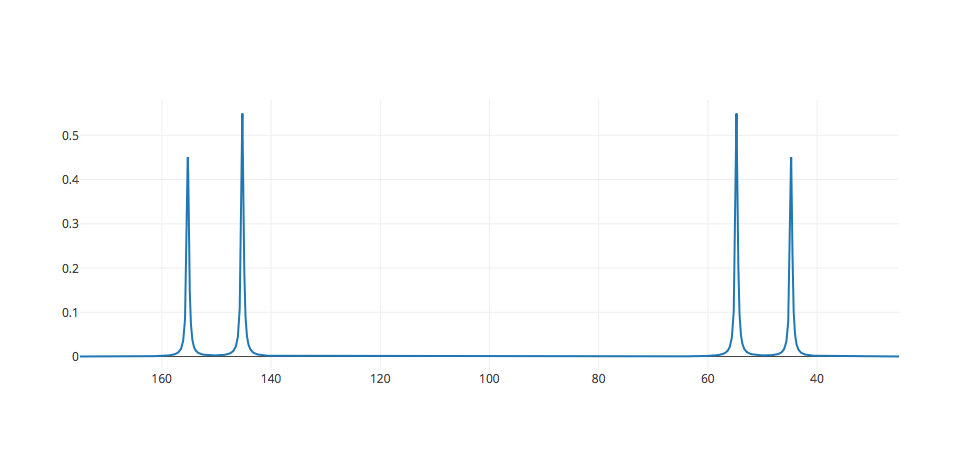

In [ ]:
from plots import interactive_AB
interactive(interactive_AB, v1=(50, 150, 0.1), v2=(50, 150, 0.1), J=(0, 20, 0.1))

- If you set v1 = 105 Hz and v2 = 87.8 Hz, the AB quartet will look exactly like a regular quartet that integrates for 2 protons. It would be easy to jump to the conclusion that this is the CH<sub>2</sub> of an ethyl group... but there would be no corresponding methyl triplet around 1 ppm.

- Change v1 to 102 Hz and v2 to 98 Hz. The outer peaks are very small and could easily be missed if the baseline was noisy or if other signals were nearby. The two inner peaks are starting to collapse together. This could easily be misidentified as a ~2 proton doublet, since the outer peaks don't contribute much to the total area. The small distance between the two inner peaks could be misinterpreted as a small *J* coupling.

One way to reveal an AB quartet is to take the spectrum on two different spectrometers with very different frequencies. 

- From the previous example, change v1 to 104 Hz and v2 to 96 Hz. This simulates doubling the spectrometer frequency (e.g. from 300 MHz to 600 MHz). The signal has a more obvious "AB quartet look", and the gap between the two inner peaks has increased (and thus is not a second-order doublet, since *J* values are constant).

In [ ]:
# note: when v1=105, v2=87.8, J=10, the ABq looks like a regular q

## ABX

This is a very common pattern. For example, if two diastereotopic protons are coupled to a third proton, this pattern can result. One common substructure that exhibits an ABX pattern is a methylene group next to a methine stereocenter (below, left). Many amino acids have this structural feature (below, right).

<img src='img/ABX.png' style='width: 400px;'>

The interactive plot below shows a typical ABX pattern. 

- If you slide the vb slider down to 50 Hz, the AB portion is tweezed apart into two doublet of doublets "leaning" toward each other. Such a system could safely be analyzed as a set of 3 dd, one for each A, B, and X signal.

- Change vb back to 90 Hz. Here, the chemical shift difference between $H_A$ and $H_B$ is less than twice $J_{AB}$, and if it were analyzed as a first-order pattern you would start to see small discrepancies. 

- Change vb to 102 Hz. To accurately determine the chemical shifts and coupling constants from this signal, a more elaborate calculation is required. If you are interested in the details, this type of calculation is described in detail here://link . At this point, the AB signal more strongly resembles two sets of overlapping AB quartets. The first, third, fourth, and seventh peaks from left to right (the two smallest and the two largest peaks) are one AB quartet, the second, 5th, 6th, and 8th are the other. Solving these patterns involves identifying the two pairs of AB quartets and solving them first.

- Change vb to 106.5 Hz. At this point, one of the two AB quartets has collapsed to a singlet, and the AB part of the ABX spectrum reduces to 5 peaks total, with two being very small. This could easily be mistaken for a singlet and a doublet.

- Take a close look at the X part of the spectrum (the leftmost signal centered at 200 Hz). It often will resemble a doublet of doublets, but there are two smaller peaks towards the outside that could easily be lost in the baseline noise. 

In [ ]:
from plots import interactive_ABX
interactive(interactive_ABX, 
            va=(50, 150, 0.1), vb=(50, 150, 0.1), 
            Jax=(-20, 20, 0.1), Jbx=(-20, 20, 0.1), Jab=(-20, 20, 0.1))

interactive(children=(FloatSlider(value=110.0, description='va', max=150.0, min=50.0), FloatSlider(value=90.0,…

## AA'XX'

This is a very common second-order pattern. We'll look at two of the more common situations in which this can arise.

In *para*-disubstituted benzenes, at low resolution, a pair of doublets is seen, and it is commonly analyzed as such. At higher resolution, the appearance of the signals becomes more complex. Usually, each signal looks like a doublet with a small AB quartet superimposed on it:


In [ ]:
from plots import para_benzene
interactive(para_benzene, 
            va=(0, 200, 0.1), vx=(0, 200, 0.1), 
            Jaa=(-20, 20, 0.1), Jxx=(-20, 20, 0.1), Jax=(-20, 20, 0.1), Jax_prime=(-20, 20, 0.1))

In acyclic systems, an X-CH<sub>2</sub>-CH<sub>2</sub>-Y unit does not necessarily appear as a pair of triplets.

- If the two methylene signals are close together in chemical shift, significant distortions appear. The interactive plot below should load as a "messtet" of two signals at 140 Hz and 160 Hz. Slide va lower and/or vx higher. As separation increases, the signals start to resemble a pair of triplets. Keep going until va is 15 Hz and vx is 200 Hz.

In [ ]:
from plots import anti_gauche
interactive(anti_gauche, 
            va=(0, 200, 0.1), vx=(0, 200, 0.1), 
            Jaa=(-20, 20, 0.1), Jxx=(-20, 20, 0.1), Jax=(-20, 20, 0.1), Jax_prime=(-20, 20, 0.1))

When there is no strong conformational preference for anti over gauche conformers (rotating about the C-C bond), you will often see this first-order behavior of two triplets. The $J_{AX}$ and $J_{AX'}$ values of 5.5 are a weighted average of the coupling constants seen in the rapidly-interconverting anti- and gauche- conformers of equal population (33 1/3 % of each). As a bias towards anti- or towards gauche- conformations increases, the signals deviate from a triplet appearance. 

- Continuing with the interactive plot above, change Jax to 3.2 Hz and Jax_prime to 10.1 Hz. This simulates a system that has an 80% preference for the anti-conformation. The signal has changed appearance, with the outermost peaks being larger than the inner peaks. This is a very common situation that suggests a second-order effect is in play--a normal n+1 multiplet has the smallest peaks on the outside, and gets larger towards the middle. Sometimes such second-order signals are called "Batman" signals because of their superficial resemblance to Batman's silhouette:

<img src='img/batman.png' style='width: 300px;'>

A more thorough description of this behavior can be found at [Prof. Reich's NMR website](https://www.chem.wisc.edu/areas/reich/nmr/05-hmr-15-aabb.htm).